# Forces Acting Within a Synestia

## Balance of Forces

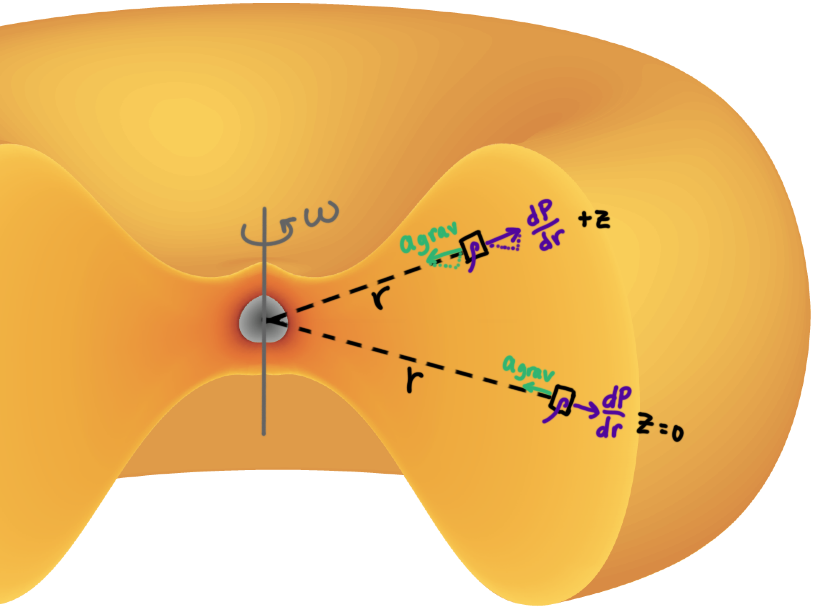

Credit: adapated from figure by Lock and Stewart (2017)

To understand the dynamics of a synestia, we must first understand its mechanics (balance of forces). There are three forces at work: the centripetal force (arises from circular motion), the pressure force from the gas, and gravity of components of the structure. A parcel of gas in a synestia is stably orbiting when it follows the following equation:
$$\omega^2r = \frac{1}{\rho}\frac{dP}{dr} + \frac{GM}{r^2}(1 - \frac{3J_2a_{eq}^2}{2r^2}(\frac{3z^2}{r^2} - 1))$$
where $\omega$ is the angular velocity of the parcel, r=(x,y,z) is the distance from the parcel to the center of the synestia (origin), $\rho$ is the density of the parcel of gas, dP/dr is the radial pressure gradient at the location of the parcel, G is the gravitational constant, M is the mass of the synestia the parcel is orbiting in, J$_2$ is the oblateness of that synestia, a$_{eq}$ is the equatorial radius of this synestia, and z is the vertical distance off the midplane of the parcel of gas.

The angular velocity of a parcel of gas in equilibrium (gravitational force, pressure force, and circular motion are balanced so that the particle maintains a stable orbit) will change according to the strength of the gravitational field and the pressure gradient surrounding it in a synestia. The gas density, gas pressure, and second-order gravity are significant forces in shaping the oblate, flared gas structure of a synestia and motion of moonlets inside a synestia.

### Gravity

The more massive a synestia is, the larger the equatorial radius of the planet-like region of a synestia is, and the more oblate a synestia is, then the stronger the gravitational field is in that synestia. The stronger the gravitational field, the higher angular velocity the gas particle inside that synestia must have in order to maintain its stable orbit.

The local strength of the gravity field of a synestia will vary based on a gas parcel's location in a synestia. The strongest gravitational forces will be along the midplane and closest to the center of a synestia. Both are considered equilibrium points (where a particle will settle when forces are balanced). As a gas parcel's distance from the rotation axis and midplane increase, the magnitude of gravity will decrease. 

### Pressure Force

Density of the gas will also vary based on the parcel's location in a synestia. There is a radial dependency for density. Density decreases off the midplane to higher z, and also decreases at larger distances from a synestia's rotational axis, cylindrical radius r$_{xy}$. Density follows a negative power law dependence in r$_{xy}$ and an exponential decay dependence in z. Density will typically follow the form:
$$\rho = \rho(r_{xy}, z) = \rho_0r_{xy}^{-a}e^{-z^2/z_s^2}$$
where $\rho_0$ is a reference density in the midplane, r$_{xy}$ is the cylindrical radius of the gas parcel and makes the base of the power law fit for the midplane, a is the exponent of the midplane's power law fit, z is the vertical position of the parcel of gas, and z$_s$ is the scale height. The scale height is a measure of how quickly the density decreases in z. It measures the e-folding time, or at what z the density reaches 1/e th of its midplane value. The scale height has a power law dependency on cylindrical radius $r_{xy}$ with the form:
$$z_s = br_{xy}^c$$
where b is a coefficent and c is the exponent of the power law.

Essentially, gas density and pressure exponentially decay from the midplane to the photosphere (cloud layer) of a synestia, and will do so more quickly at larger distances from a synestia's rotational axis. In the midplane, gas density and pressure decrease with increasing cylindrical radius according to some power law. This shapes a synestia's pressure and density fields into nested, flared contours.

The greater the density of the gas field and the pressure differential across the gas parcel [one side of the gas particle (smaller radius) has a much stronger pressure than the other side (larger radius)], the larger the pressure support will be for an orbiting gas particle. With increased pressure support, a gas parcel can orbit stably at lower angular velocities. We call these sub-Keplerian orbits. 

## Sub-Keplerian Orbits of Moonlets in Synestias: Balanced by Oblate Gravity and Pressure

### Oblate Gravity Term

You can see how a moon travels when only a synestia's gravity (first and second order) is at play, so that we have a baseline to compare to. The oblateness of a synestia's gravity field is non-negligible. A synestia's gravity field has extra gravitational acceleration closest to both the midplane and center of a synestia due to the oblateness of a synestia. Notice how any orbits off the midplane are affected by the J$_2$ term in a synestia's gravity. The orbit of a moonlet within the gravity field of an Earth-mass synestia is shown below. The equivalent Keplerian orbit (first order gravity only) is shown for reference in grey, with the central mass indicated by a black star.

In [26]:
import rebound
from syndef import synfits #import synestia snapshot (impact database)
import numpy as np
from ipywidgets import *
import math
import matplotlib.pyplot as plt

dens = 3000. #kg/m^3
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
J2Ma2 = synfits.SNAP_Canup.J2Ma2

#from rebound.plotting import fading_line
def pltJ2(rad_moon,sma,i,ecc):
    #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim_kep = rebound.Simulation() #start simulation
    sim_kep.units = ('Hr', 'M', 'Kg') #use SI units
    sim_kep.add(m=Mass_syn) #add central body
    sim_kep.add(m=m_moon,a=sma,inc=i,e=ecc)
    sim_kep.move_to_com()
    ps_kep = sim_kep.particles
    kep_moon = ps_kep[1]
    kep_orbit = np.asarray(kep_moon.sample_orbit())
    
    sim_j2 = rebound.Simulation() #start simulation
    sim_j2.units = ('Hr', 'M', 'Kg') #use SI units
    sim_j2.min_dt = 0.001 #prevents time step from getting too small
    sim_j2.add(m=Mass_syn) #add central body
    sim_j2.add(m=m_moon,a=sma,inc=i,e=ecc)
    ps_j2 = sim_j2.particles
    
    def J2(sim_j2):
        r_orb = (ps_j2[1].x**2 + ps_j2[1].y**2 + ps_j2[1].z**2)**0.5
        costheta = ps_j2[1].z/r_orb
        grav2 = 3.0*G_hr*J2Ma2*(r_orb**(-5))
        ps_j2[1].ax -= ps_j2[1].x*grav2*( 2.5*costheta*costheta - 0.5 )
        ps_j2[1].ay -= ps_j2[1].y*grav2*( 2.5*costheta*costheta - 0.5 )
        ps_j2[1].az -= ps_j2[1].z*grav2*( 2.5*costheta*costheta - 1.5 )
    
    sim_j2.additional_forces = J2
    sim_j2.move_to_com()
    
    N = 1000 # number of integration points
    # for more inclined or eccentric orbits,
    # for larger orbits,
    # need more integration time
    if ((i > 1. ) or (ecc > 0.6)):
        t_final = 100. #hr
    elif ((i > 0.2) or (ecc > 0.3)):
        t_final = 50. #hr
    elif (sma > 30000000.):
        t_final = 100.
    else:
        t_final = 20. #hr
    j2_x = np.zeros(N) #m
    j2_y = np.zeros(N) #m
    j2_z = np.zeros(N) #m
    times = np.linspace(0.,t_final,N) #hr
    for k,time in enumerate(times):
        sim_j2.integrate(time)
        j2_x[k] = ps_j2[1].x
        j2_y[k] = ps_j2[1].y
        j2_z[k] = ps_j2[1].z
        
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    plt.plot(0,0,'k*')
    plt.plot(j2_x,j2_y)
    plt.plot(kep_orbit[:,0], kep_orbit[:,1], color='grey')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.subplot(132)
    plt.plot(j2_x, j2_z, label='Gravity with J$_2$')
    plt.plot(kep_orbit[:,0], kep_orbit[:,2], color='grey', label='Keplerian')
    plt.plot(0,0,'k*')
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.axis('equal')
    plt.legend(loc=1)
    plt.subplot(133)
    plt.plot(j2_y, j2_z)
    plt.plot(kep_orbit[:,1], kep_orbit[:,2], color='grey')
    plt.plot(0,0,'k*')
    plt.xlabel('y (m)')
    plt.ylabel('z (m)')
    plt.axis('equal')
    plt.show()
    plt.close()
    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltJ2,
         rad_moon=FloatSlider(value=1, min=1, max=100, step=10, description='Body radius of moonlet (m)',
                            continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         sma=FloatSlider(value=20e6, min=10e6, max=60e6, step=10e6, description='Semi-major axis (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         i=FloatSlider(value=0, max=2.*math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         ecc=FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Body radius of moonlet (m)'…

<function __main__.pltJ2(rad_moon, sma, i, ecc)>

Similar to a Keplerian orbit, changing the size of the satellite (moon) does not affect the trajectory of its gravitationally balanced orbit. The second-order gravity term affects the orbit of the moon only near certain locations (e.g. at smaller radii nearest the midplane).

The moon's orbit significantly deviates from Keplerian in orbits with a smaller semi-major axis. As the semi-major axis of the moon's orbit grows (and the moon moves farther away from the central body), the J$_2$ term is not as strong. Since the oblate gravity affects the orbit less at larger radii, the moon orbits much closer to the corresponding Keplerian orbit.

As the inclination of the moon's orbit increases, the moon's orbit rotates, so that the farthest distance from the central body in the orbit changes (x, y) position with time. As the moon passes through the midplane on an inclined orbit, the increase in the J$_2$ gravity term nudges the moonlet outward (a small increase in distance from the central body, r$_{xy}$). This helps turn the moon's orbit about the central body's rotational axis. Inclination affects the moon's orbit in another way. When the moon's orbit moves in the z-direction, along the rotational axis (r$_{xy}$ = 0), the moon will orbit closer to the central body. In the midplane (z = 0), the moon orbits farther away, due to an increase in the J$_2$ gravity term as the moon passes the most oblate portion of the central body (along its equator, in the midplane).

Increasing the eccentricity of the moon's orbit will also rotate the orbit about the central body's rotational axis. As the moon moves through the region where J$_2$ gravity is significant and back out into a region where it is not, the moon will overshoot its orbit a bit and this moves the orbit over. Over time, this allows the orbit to rotate within the midplane. The overshoot can be significant as the orbit's eccentricity increases. If the eccentricity of the moon's orbit is too high, the moon will escape the gravity of the central body and fly off the plot. An eccentric orbit sends the moon into a region of a synestia where oblate gravity is essentially negligible then back again into a region where oblate gravity has a significant effect on the moon's trajectory. This means that the magnitude of gravitational force acting upon the moon changes greatly throughout its orbit, which can destabilize the orbit to a varying degree, based on the eccentricity of the orbit. The larger the eccentricity, the larger the variation, and the more likely destabilization will happen (quickly).

### Pressure Term

The pressure gradient term is significant in a synestia and allows a parcel of gas to orbit at a speed slower than would be allowed with gravity only (Keplerian). Parcels of gas in a synestia orbit at sub-Keplerian velocities. In other words, the angular velocity is lower than what it would be for a Keplerian orbit.

To maintain a stable (no inward or outward spiralling) elliptical orbit (forces are balanced), an orbiting body must move fast enough around its central body to resist the inward pull of the total sum of forces (typically gravity, but pressure also acts in a synestia). For a Keplerian orbit, the only force that is acting (and is balanced) is gravity. In the non-corotating region of a synestia, the material experiences a sub-Keplerian orbit. There is sufficient pressure support to counteract gravity in z and lessen the strength of gravity in the $r_{xy}$ direction. The strength of the sum of inward forces is less than it would be for a Keplerian orbit. This allows the gas in a synestia to orbit at an angular velocity that is slower than it would be for an equivalent Keplerian orbit.

Take a look below at the angular velocity profile corresponding to the sub-Keplerian orbit of gas particles at various radii within a synestia.

In [25]:
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
J2Ma2 = synfits.SNAP_Canup.J2Ma2
const1 = -6. #coefficient of pressure gradient fit
const2 = 57.4 #exponent of pressure gradient fit
const5 = 10.55 #coefficient of density height fit
const6 = 0.86 #exponent of density scale height fit
const3 = 0.9e35 #coefficient of density midplane fit
const4 = -4.7 #exponent of density scale midplane fit

def omgJ2Press(Pmultiplier,r_orbit,rxy_orb,z_orb):
    cosO = z_orb/r_orbit
    grav = -G_hr*Mass_syn*(r_orbit**(-2)) #- 1.5*G_hr*J2Ma2*(r_orbit**(-4))*(3.*cosO*cosO - 1.)
    zsfit = const5*(rxy_orb**const6)
    rhomid = const3*(rxy_orb**const4)
    rhofit = rhomid*np.exp(-(z_orb/zsfit)**2)
    Pfactor = Pmultiplier*const1*(10**const2)*(r_orbit**(const1-1.))/rhofit #*Pmultiplier
    return np.sqrt((Pfactor - grav)/r_orbit)

def pltomg(z,Pmult):
    rxy=np.linspace(1e7,6e7,50) #m
    r=np.sqrt(rxy**2 + z**2) #m
    omg=omgJ2Press(Pmult,r,rxy,z) #hr^-1
    omg_Kep=np.sqrt(G_hr*Mass_syn/(r**3)) #hr^-1
    
    plt.figure(figsize=(10,6))
    plt.plot(r/1e3, omg, 'r',label='Pressure supported orbit with J$_2$')
    plt.plot(r/1e3, omg_Kep, '--', color='grey',label='Keplerian orbit')
    plt.xlabel('Radius r (km)')
    plt.ylabel('Angular Velocity $\omega$ (hr$^{-1}$)')
    plt.legend(loc=1)
    plt.show()
    plt.close()
    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltomg,
         z=FloatSlider(value=0, min=0, max=3e7, step=1e7, description='Distance from the midplane z (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         Pmult=FloatLogSlider(value=1, min=-1, max=0.5, base=10, step=.5, description='Pressure term multiplier',
                        continuous_update=False, readout=True, readout_format='.1e', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Distance from the midplane …

<function __main__.pltomg(z, Pmult)>

This is a plot of the angular velocity profile of a synestia (red) at a specified z (z = 0 is the midplane, z = 10,000 km is an xy plane with a distance off the midplane of 10,000 km and so on). The corresponding Keplerian angular velocity profile is plotted as a dashed grey line for reference. Feel free to change the pressure term multiplier. The higher the multiplier, the stronger the pressure support will be. The pressure support allows the gas to orbit at angular velocities slower than their Keplerian equivalent.

It is not shown here, but at smaller radii (< 10,000 km), the angular velocity profile is flat. This is the corotating region. It is a region of maximum angular velocity in a synestia where all material rotates about the body's axis with the same (rapid) angular velocity. At larger radii, the profile drops off, where material in a synestia can no longer corotate. There is a smooth transition between the corotating region (< 10,000 km) of a synestia and the disk-like region (> 10,000 km). The angular velocity profile of a synestia is continuous because there are no dynamically distinct features of a synestia. It is a connected body. In the disk-like region of a synestia, due to a strong pressure gradient at smaller radii, the angular velocities of gas rotating in a synestia will more sub-Keplerian than gas at larger radii (which is nearly Keplerian).

#### Hydrostatic Equilibrium

The z component of the pressure gradient allows a particle to orbit at the same z. In other words, gas parcels experience hydrostatic equilibrium in z. The parcel of gas's gravitational pull towards the midplane is balanced by the vertical pressure gradient. Gas parcels will not move in the z direction; they have zero movement in z. Hydrostatic equilibrium in z follows this equation:
$$\frac{dP}{dz} = -\rho g_z = -\rho(r_{xy}, z)\frac{GMz}{r^3}(1 - \frac{3J_2a_{eq}^2}{r^2}(\frac{2.5z^2}{r^2} - 1.5))$$
where g$_z$ is the z component of the gravitational acceleration acting at a particular location r = (x, y, z) in a synestia with equatorial radius a$_{eq}$, total mass M, and J$_2$ factor based on its mass distribution (oblateness).

The magnitude of the pressure gradient in z of the gas in a synestia will change according to the magnitude of the gas density and gravitational acceleration in z at a particular r$_{xy}$ = (x, y), z location. The pressure gradient term in the balance of forces in a synestia is responsible for the puffiness of a synestia. It causes a synestia to flare and take on a disk-like shape. 

Let's take a look below at the pressure field of an example Moon-forming synestia. If a synestia is in hydrostatic equilibrium, it should look like a flared disk and have the same contours as would be expected for hydrostatic equilibrium.

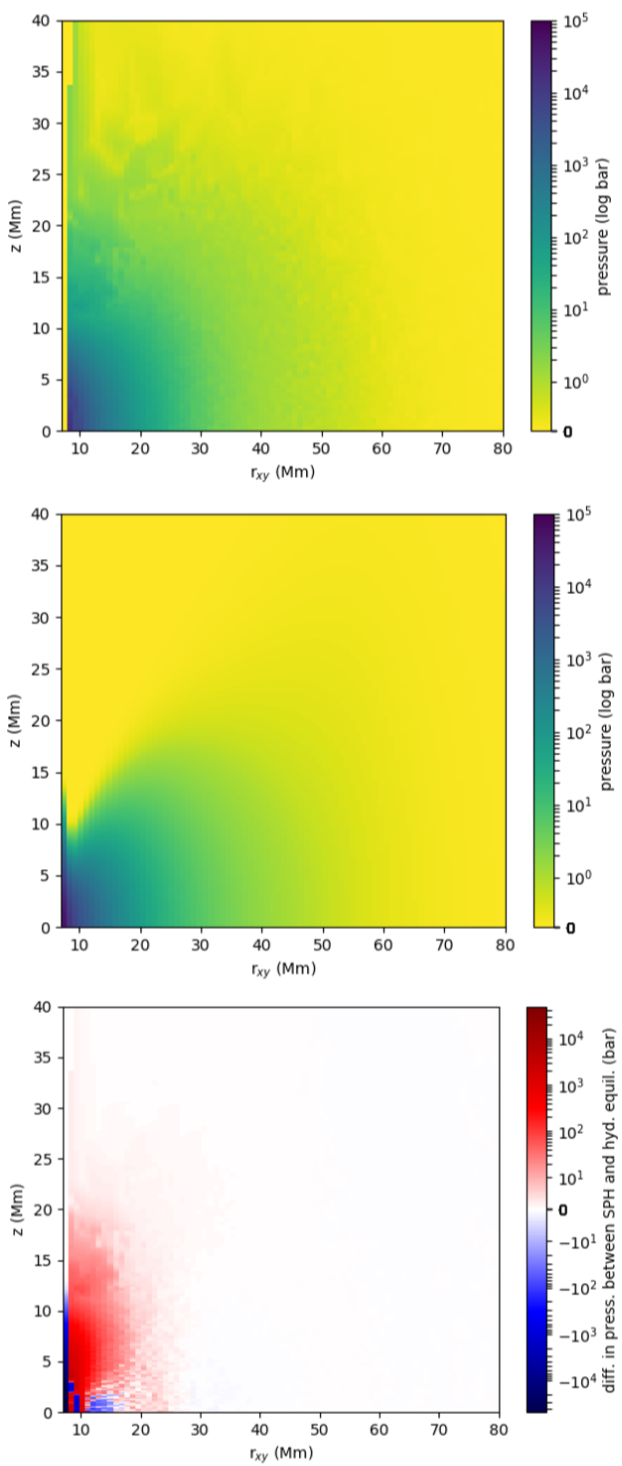

In [ ]:
#make these static images

from matplotlib.colors import Normalize,SymLogNorm

s_isen=7.866e-3 #MJ/K/kg specific entropy

NewEOS.loadextsesame('NEW-SESAME-EXT.TXT')
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT')
NewEOS.MODELNAME='GADGET2 Forsterite'
NewEOS.MDQ=np.zeros((NewEOS.NT,NewEOS.ND))
NewEOS.MATID=1.0
NewEOS.DATE=190802.
NewEOS.VERSION=1.0
NewEOS.FMN=70.
NewEOS.FMW=140.691
NewEOS.R0REF=3.32
NewEOS.K0REF=1.446E12
NewEOS.T0REF=298.
NewEOS.P0REF=1.E6
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT')

rxy = np.linspace(1e7,8e7,100)
z = np.linspace(0.1,4e7,100)
isen = synfits.isentrope_class()
isen.loadisen(s_isen,NewEOS)
hyd = synfits.hydrostat(flag=1,rxy,z)
hyd.loadhyd(LSQ,s_isen,synfits.SNAP_Canup.J2Ma2,Mass_syn)
hyd.calc_hydrostat_equil(isen)
pdiff,pgrid=hyd.calc_pdiff(synfits.SNAP_Canup.rxy,synfits.SNAP_Canup.z,synfits.SNAP_Canup.P)

A=hyd.RXY/1e3 #km
B=hyd.Z/1e3 #km
C=hyd.P/1e5 #atm
D=pgrid-(hyd.P/1e5) #atm

cmap1=plt.get_cmap('viridis_r')
norm1=SymLogNorm(linthresh=1.,vmin=0.,vmax=1.e5)
extent=[np.amin(A),np.amax(A),np.amin(B),np.amax(B)]

cmap2=plt.get_cmap('seismic')
pdiffmax=np.amax(D)
pdiffmin=np.amin(D)
if pdiffmax < -pdiffmin:
    pdifflim = -pdiffmin
elif pdiffmax >= -pdiffmin:
    pdifflim = pdiffmax
norm2=SymLogNorm(linthresh=10.,vmin=-pdifflim,vmax=pdifflim)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(pgrid.T,cmap=cmap1,norm=norm1,aspect='auto',origin='lower',interpolation='none',extent=extent)
plt.colorbar(label='pressure (log atm)')
plt.xlabel('r$_{xy}$ (km)')
plt.ylabel('z (km)')
plt.xlim([1e4,8e4])
plt.ylim([0,4e4])
plt.subplot(122)
plt.imshow(D.T,cmap=cmap2,norm=norm2,aspect='auto',origin='lower',interpolation='none',extent=extent)
plt.colorbar(label='diff. in press. between SPH and hyd. equil. (atm)')
plt.xlabel('r$_{xy}$ (km)')
plt.ylabel('z (km)')
plt.xlim([1e4,8e4])
plt.ylim([0,4e4])
plt.show()
plt.close()

As you can see, the pressure contours match nicely with those expected for hydrostatic equilibrium. They also line up with the shape of the synestia, as is expected since the pressure contours are a result of the gas structure in a synestia.

Top plot is the interpolated pressure field of the SPH output. Middle plot is pressure field calculated from hydrostatic equibrlium based on fit of SPH midplane pressures. The bottom plot is the difference between SPH and hydrostatic equilibrium. Positive (red) difference indicate where SPH overestimates pressures; negative (blue) differences mark where SPH underestimates pressures. The inner region is not in hydrostatic equilibrium.